<a href="https://colab.research.google.com/github/charmy2525/DataAnalytics/blob/main/4_6_2_Data_Clustering_Session_Activity_6_Clustering_Evaluation_Pseudo_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pseudo-F ทดสอบทางสถิติ เพื่อยืนยนัความเป็น Cluster

## Load Data

In [ ]:
import pandas as pd
cleand_data_csv = 'https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20output%20after%20data%20cleaning.csv'
data_file ='https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20data.csv'
df = pd.read_csv(cleand_data_csv)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Student_ID                         943 non-null    int64  
 1   Year_of_Entry                      943 non-null    float64
 2   TCAS_channels                      943 non-null    float64
 3   Years_Living_in_BKK                943 non-null    float64
 4   Hometown_REGION                    943 non-null    object 
 5   Address_Type                       943 non-null    object 
 6   Where_to_stay                      943 non-null    object 
 7   Time_spent_for_traveling           943 non-null    int64  
 8   InternetAccess_at_Home             943 non-null    object 
 9   Living_expenses                    943 non-null    int64  
 10  Type_of_prior_school               943 non-null    object 
 11  Prior_School_Province_REGION       943 non-null    object 

## Select Feature and Normalize data

In [ ]:
feature = ['University_GPAx_1st_year','Living_expenses/Household_income']#
copy_feature = ['University_GPAx_1st_year','Household_income','Living_expenses']
df2 = df[copy_feature].copy()
df2['Living_expenses/Household_income'] = df2['Living_expenses']/df2['Household_income']
df2 = df2.drop(columns=['Household_income','Living_expenses'])
df2 = df2.apply(pd.to_numeric)

normalized_df=(df2-df2.min())/(df2.max()-df2.min())
normalized_df=(df2-df2.mean(axis=0)) / df2.std(axis=0)
normalized_df['Living_expenses/Household_income']=normalized_df['Living_expenses/Household_income']*0.5

normalized_df

,University_GPAx_1st_year,Living_expenses/Household_income
0,0.888762,-0.271790
1,-0.439994,0.851092
2,0.828364,-0.300055
3,0.204252,-0.282216
4,-1.043974,0.211480
...,...,...
938,0.163986,-0.248430
939,1.633671,-0.516951
940,-0.721851,0.726110
941,-0.983576,1.163546


## ทำ K-Mean Clustering และแสดงผลการจัดกลุ่ม

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


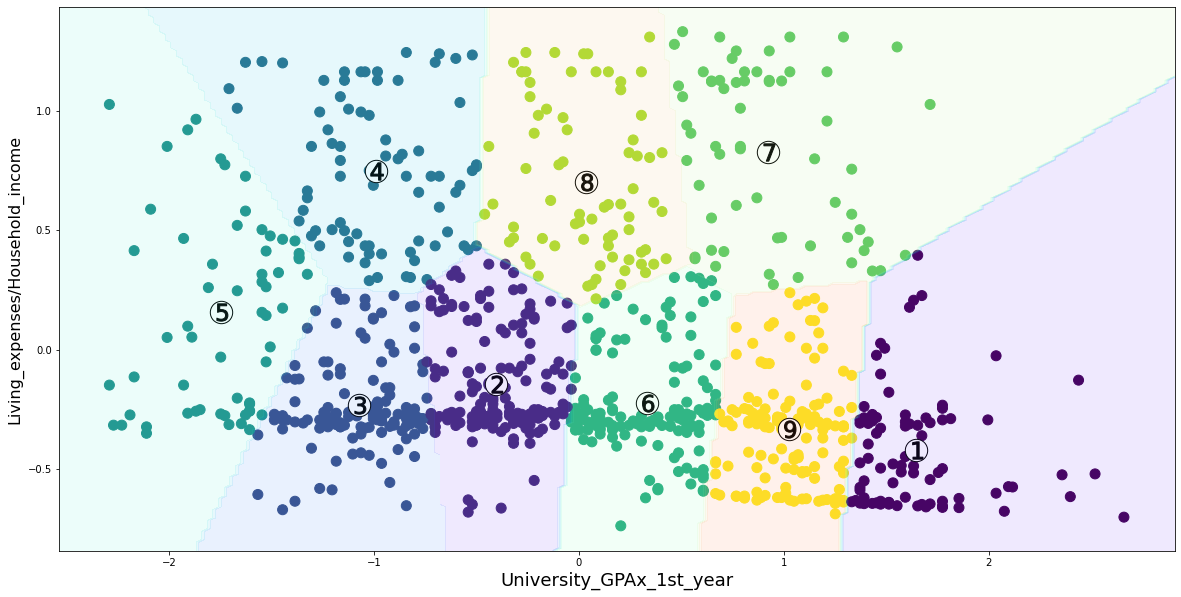

In [ ]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt, colors
import numpy as np

n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters, random_state=5)
kmeans.fit(normalized_df)
cluster_labels = kmeans.fit_predict(normalized_df)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(20, 10))

plt.scatter(normalized_df[feature[0]], normalized_df[feature[1]], c=cluster_labels, alpha=50,s=100)

plt.scatter(centroids[:,0], centroids[:,1], marker="o",c="white", alpha=1, s=500, edgecolor="k")
for i, c in enumerate(centroids):
  plt.scatter(c[0], c[1], marker="$%d$" % (i+1), alpha=1, s=300, edgecolor="k",c='black')   
plt.xlabel(feature[0], fontsize=18)
plt.ylabel(feature[1], fontsize=16)

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),np.linspace(*ylim, num=200))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Create a color plot with the results
n_classes = len(np.unique(cluster_labels))
contours = plt.gca().contourf(xx, yy, Z, alpha=0.1,levels=np.arange(n_classes + 1),cmap='rainbow',zorder=1)
plt.gca().set(xlim=xlim, ylim=ylim)

plt.show()

## ทดสอบ Pseudo-F

In [ ]:
from scipy.stats import f


xx=0
for i in range(n_clusters):
  xx += sum(kmeans.labels_==i)*np.linalg.norm(kmeans.cluster_centers_[i]-np.mean(normalized_df, axis=0))

pseudoF = (xx/(n_clusters-1))/(kmeans.inertia_/(len(normalized_df)-n_clusters))
print(pseudoF)


alpha = 0.05
p_value = 1-f.cdf(pseudoF, n_clusters-1, len(normalized_df)-n_clusters)
if p_value < alpha :
  print(f"There are :{n_clusters} clusters in the data with p-value = {round(p_value,3)} with alpha = {alpha} ")
else:
  print(f"There are no clusters in the data with p-value = {round(p_value,3)} with alpha = {alpha} ")

935.8304458867708
There are :9 clusters in the data with p-value = 0.0 with alpha = 0.05 


# Elbow method with SSE

## Load Data

In [ ]:
import pandas as pd
cleand_data_csv = 'https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20output%20after%20data%20cleaning.csv'
data_file ='https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20data.csv'
df = pd.read_csv(cleand_data_csv)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Student_ID                         943 non-null    int64  
 1   Year_of_Entry                      943 non-null    float64
 2   TCAS_channels                      943 non-null    float64
 3   Years_Living_in_BKK                943 non-null    float64
 4   Hometown_REGION                    943 non-null    object 
 5   Address_Type                       943 non-null    object 
 6   Where_to_stay                      943 non-null    object 
 7   Time_spent_for_traveling           943 non-null    int64  
 8   InternetAccess_at_Home             943 non-null    object 
 9   Living_expenses                    943 non-null    int64  
 10  Type_of_prior_school               943 non-null    object 
 11  Prior_School_Province_REGION       943 non-null    object 

## Select Feature and Normalize data

In [ ]:
feature = ['University_GPAx_1st_year','Living_expenses/Household_income']#
copy_feature = ['University_GPAx_1st_year','Household_income','Living_expenses']
df2 = df[copy_feature].copy()
df2['Living_expenses/Household_income'] = df2['Living_expenses']/df2['Household_income']
df2 = df2.drop(columns=['Household_income','Living_expenses'])
df2 = df2.apply(pd.to_numeric)

normalized_df=(df2-df2.min())/(df2.max()-df2.min())
normalized_df=(df2-df2.mean(axis=0)) / df2.std(axis=0)
normalized_df['Living_expenses/Household_income']=normalized_df['Living_expenses/Household_income']*0.5

normalized_df

,University_GPAx_1st_year,Living_expenses/Household_income
0,0.888762,-0.271790
1,-0.439994,0.851092
2,0.828364,-0.300055
3,0.204252,-0.282216
4,-1.043974,0.211480
...,...,...
938,0.163986,-0.248430
939,1.633671,-0.516951
940,-0.721851,0.726110
941,-0.983576,1.163546


## Elbow Method Loop

For n_clusters = 2 The SSE is : 489.7511165944375 The SSE change% is : N/A
For n_clusters = 3 The SSE is : 346.62514585905046 The SSE change% is : 0.41291283233555975
For n_clusters = 4 The SSE is : 256.6059160553176 The SSE change% is : 0.3508073047868743
For n_clusters = 5 The SSE is : 203.93618041409525 The SSE change% is : 0.2582657747844239
For n_clusters = 6 The SSE is : 166.48952385928206 The SSE change% is : 0.2249189960232172
For n_clusters = 7 The SSE is : 145.2440743621525 The SSE change% is : 0.14627412230364745
For n_clusters = 8 The SSE is : 126.52675101109807 The SSE change% is : 0.14793174725092473
For n_clusters = 9 The SSE is : 112.88263610397769 The SSE change% is : 0.12086991744729114
For n_clusters = 10 The SSE is : 101.42895755265047 The SSE change% is : 0.11292316146877246
For n_clusters = 11 The SSE is : 89.25329066681901 The SSE change% is : 0.13641700821186542
For n_clusters = 12 The SSE is : 79.67235285685916 The SSE change% is : 0.12025423457963069
For n_clu

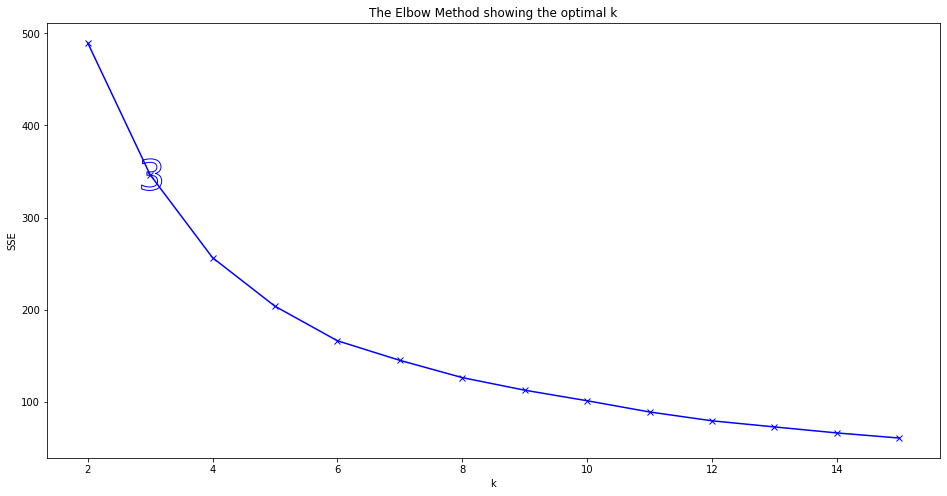

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans

min_k = 2
max_k = 15
range_n_clusters = range(min_k,max_k+1)
SSE_array = []
x_min = min_k
y_min = 0
z_min = 1000000
z = None
for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
 
    kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(normalized_df)
    cluster_labels = kmeans.fit_predict(normalized_df)

    if (z is not None) and (((z/kmeans.inertia_) - 1) >= y_min) :
      x_min = n_clusters
      y_min = (z/kmeans.inertia_)-1
      z_min = kmeans.inertia_
    
    if (z is not None) : 
      A = ((z/kmeans.inertia_) -1 )
    else :
      A = 'N/A'
    SSE_array.append(kmeans.inertia_)
    print(
        "For n_clusters =",
        n_clusters,
        "The SSE is :",
        kmeans.inertia_,
        "The SSE change% is :",
        A,
    )

    z = kmeans.inertia_
    y_lower = 10       

    # Labeling the clusters
    centers = kmeans.cluster_centers_

plt.figure(figsize=(16,8))
plt.plot(range_n_clusters, SSE_array, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.scatter( x_min , z_min ,marker="$%d$" % x_min, s=1000 ,  facecolors='none', edgecolors='blue' ) 

plt.show()

## รัน K-Mean อีกครั้ง กำหนดจำนวน Cluster ตามที่ทำให้ค่าชี้วัดดีที่สุด

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


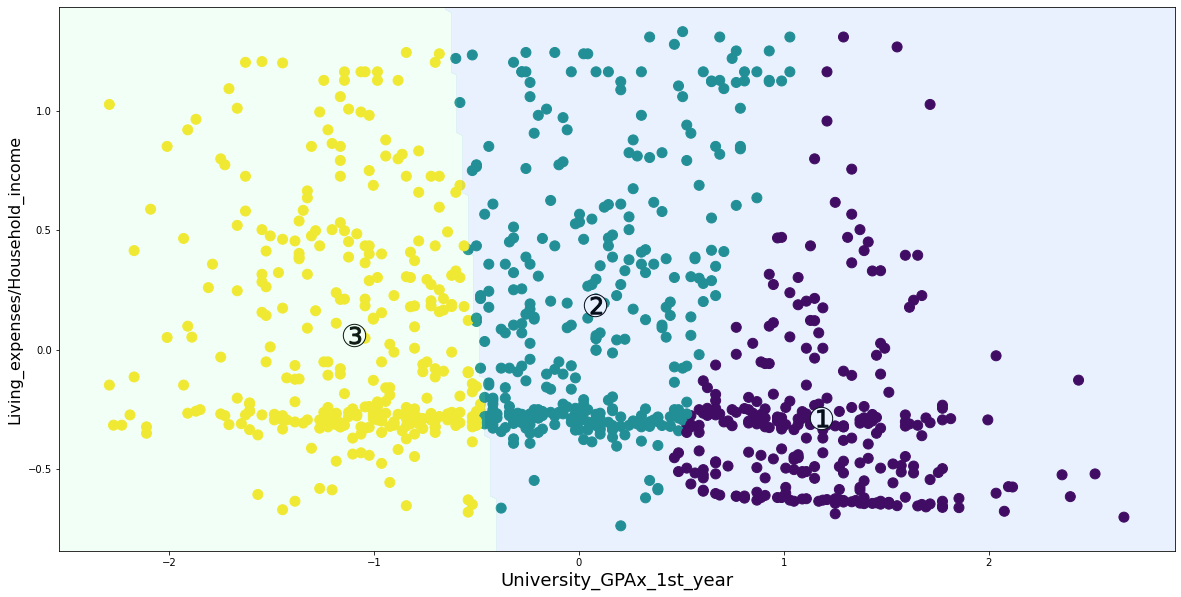

In [ ]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt, colors
import numpy as np

n_clusters = x_min
kmeans = KMeans(n_clusters=n_clusters, random_state=5)
kmeans.fit(normalized_df)
cluster_labels = kmeans.fit_predict(normalized_df)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(20, 10))

plt.scatter(normalized_df[feature[0]], normalized_df[feature[1]], c=cluster_labels, alpha=50,s=100)

plt.scatter(centroids[:,0], centroids[:,1], marker="o",c="white", alpha=1, s=500, edgecolor="k")
for i, c in enumerate(centroids):
  plt.scatter(c[0], c[1], marker="$%d$" % (i+1), alpha=1, s=300, edgecolor="k",c='black')   
plt.xlabel(feature[0], fontsize=18)
plt.ylabel(feature[1], fontsize=16)

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),np.linspace(*ylim, num=200))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Create a color plot with the results
n_classes = len(np.unique(cluster_labels))
contours = plt.gca().contourf(xx, yy, Z, alpha=0.1,levels=np.arange(n_classes + 1),cmap='rainbow',zorder=1)
plt.gca().set(xlim=xlim, ylim=ylim)

plt.show()

## ทดสอบ Pseudo-F

In [ ]:
from scipy.stats import f


xx=0
for i in range(n_clusters):
  xx += sum(kmeans.labels_==i)*np.linalg.norm(kmeans.cluster_centers_[i]-np.mean(normalized_df, axis=0))

pseudoF = (xx/(n_clusters-1))/(kmeans.inertia_/(len(normalized_df)-n_clusters))
print('pseudo-F statistic = ',pseudoF)


alpha = 0.05
p_value = 1-f.cdf(pseudoF, n_clusters-1, len(normalized_df)-n_clusters)
if p_value < alpha :
  print(f"There are :{n_clusters} clusters in the data with p-value = {round(p_value,3)} with alpha = {alpha} ")
else:
  print(f"There are no clusters in the data with p-value = {round(p_value,3)} with alpha = {alpha} ")

pseudo-F statistic =  1048.2113501445128
There are :3 clusters in the data with p-value = 0.0 with alpha = 0.05 
